In [2]:
#!pip install xgboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.7 MB/s eta 0:00:00


In [3]:
#import modul
import numpy as np 
import datetime
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats

from catboost import CatBoostRegressor
from google.cloud import bigquery
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor

#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
#Preparation Data - EDA

In [5]:
#Get Data 
url1 = 'https://raw.githubusercontent.com/ilhamwawan/DSLS_2023/main/Mini%20Project%20Data%20Science/dataset/aggregate_alerts_Kota%20Banjar.csv'
data_alerts = pd.read_csv(url1)
data_alerts.head(5)

,id,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
0,5953008,2022-07-11 20:00:00.000,32.79,KOTA BANJAR,NaN,ACCIDENT,"[108.646393, -7.357648]",2,2022-07-11
1,5953009,2022-07-11 21:00:00.000,32.79,KOTA BANJAR,NaN,ACCIDENT,"[108.646393, -7.357647999999996]",59,2022-07-11
2,5953010,2022-07-11 21:00:00.000,32.79,KOTA BANJAR,NaN,WEATHERHAZARD,"[108.665489, -7.358069999999999]",31,2022-07-11
3,5953011,2022-07-11 22:00:00.000,32.79,KOTA BANJAR,NaN,ACCIDENT,"[108.646393, -7.357647999999996]",60,2022-07-11
4,5953012,2022-07-11 23:00:00.000,32.79,KOTA BANJAR,NaN,ACCIDENT,"[108.646393, -7.357648]",1,2022-07-11


In [6]:
#Get Data 

url2 = 'https://raw.githubusercontent.com/ilhamwawan/DSLS_2023/main/Mini%20Project%20Data%20Science/dataset/aggregate_median_irregularities_Kota%20Banjar.csv'
data_irregularities = pd.read_csv(url2)
data_irregularities.head(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
0,2022-07-14 15:00:00.000,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,2,1845.0,314.0,41.97,5,NaN,481.0,13.79,2022-07-14,2.0,1505787,"MULTILINESTRING ((108.509759 -7.348402, 108.50..."
1,2022-07-14 15:00:00.000,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,4,738.0,638.0,41.94,1,NaN,715.0,3.71,2022-07-14,4.0,1505788,"LINESTRING (108.501217 -7.346638, 108.501175 -..."
2,2022-07-17 16:00:00.000,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,3,2695.0,380.0,38.57,5,NaN,594.0,16.32,2022-07-17,3.0,1516050,"MULTILINESTRING ((108.492578 -7.344833, 108.49..."
3,2022-07-17 20:00:00.000,32.79,KOTA BANJAR,N13 Jalan Raya Batulawang,3,941.0,347.0,43.95,3,NaN,418.0,8.10,2022-07-17,3.0,1516051,"MULTILINESTRING ((108.5608 -7.43088, 108.56046..."
4,2022-07-17 20:00:00.000,32.79,KOTA BANJAR,N13 Jalan Raya Batulawang,4,941.0,357.0,43.95,2,NaN,427.0,7.92,2022-07-17,4.0,1516052,"LINESTRING (108.555026 -7.425806, 108.555456 -..."


In [7]:
#Get Data 

url3 = 'https://raw.githubusercontent.com/ilhamwawan/DSLS_2023/main/Mini%20Project%20Data%20Science/dataset/aggregate_median_jams_Kota%20Banjar.csv'
data_jams = pd.read_csv(url3)
data_jams.head(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 02:00:00.000,32.79,KOTA BANJAR,N13 Jalan Raya Ciamis-Banjar,1,2201.0,84.0,29.779999,6,33489989,2022-07-06,1.0,"MULTILINESTRING ((108.470602 -7.350802, 108.47..."
1,2022-07-06 06:00:00.000,32.79,KOTA BANJAR,N13 Letjen Soewarto,3,561.0,87.0,10.670000,1,33489990,2022-07-06,3.0,"LINESTRING (108.541986 -7.369257, 108.541931 -..."
2,2022-07-06 07:00:00.000,32.79,KOTA BANJAR,N15 Siliwangi,2,1637.0,110.0,27.110000,7,33489992,2022-07-06,2.0,"MULTILINESTRING ((108.566017 -7.359884, 108.56..."
3,2022-07-06 07:00:00.000,32.79,KOTA BANJAR,N13 Letjen Soewarto,3,561.0,65.5,12.035000,2,33489991,2022-07-06,3.0,"LINESTRING (108.541068 -7.374205, 108.541374 -..."
4,2022-07-06 09:00:00.000,32.79,KOTA BANJAR,N13 Letjen Soewarto,2,501.0,63.5,12.705000,2,33489995,2022-07-06,2.0,"LINESTRING (108.541931 -7.369831, 108.541986 -..."


In [8]:
#menggabung tabel data_jams dan data_irregularitis berdasarkan street dan waktu
df=pd.merge(data_jams, data_irregularities, how='outer', on=['street', 'time'])

In [9]:
#menggabung hasil gabungan (tabel data_jams dan data_irregularitis)/ df dengan data_alerts  berdasarkan street dan waktu
df1=pd.merge(df, data_alerts, how='outer', on=['street', 'time'])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 0 to 1620
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         1621 non-null   object 
 1   kemendagri_kabupaten_kode_x  1588 non-null   float64
 2   kemendagri_kabupaten_nama_x  1588 non-null   object 
 3   street                       1440 non-null   object 
 4   level                        1588 non-null   float64
 5   median_length_x              1588 non-null   float64
 6   median_delay                 1588 non-null   float64
 7   median_speed_kmh             1588 non-null   float64
 8   total_records_x              1588 non-null   float64
 9   id_x                         1588 non-null   float64
 10  date_x                       1588 non-null   object 
 11  median_level                 1588 non-null   float64
 12  geometry_x                   1588 non-null   object 
 13  kemendagri_kabupat

In [11]:
df1.isnull().sum()

time                              0
kemendagri_kabupaten_kode_x      33
kemendagri_kabupaten_nama_x      33
street                          181
level                            33
median_length_x                  33
median_delay                     33
median_speed_kmh                 33
total_records_x                  33
id_x                             33
date_x                           33
median_level                     33
geometry_x                       33
kemendagri_kabupaten_kode_y    1555
kemendagri_kabupaten_nama_y    1555
jam_level                      1555
median_length_y                1555
median_delay_seconds           1555
median_regular_speed           1555
total_records_y                1555
cause_type                     1621
median_seconds                 1555
median_speed                   1555
date_y                         1555
median_jam_level               1555
id_y                           1555
geometry_y                     1555
id                          

In [12]:
# Karena banyak missing value maka saya memutuskan hanya akan memakai data_jams saja
data_jams.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       1550 non-null   object 
 1   kemendagri_kabupaten_kode  1550 non-null   float64
 2   kemendagri_kabupaten_nama  1550 non-null   object 
 3   street                     1386 non-null   object 
 4   level                      1550 non-null   int64  
 5   median_length              1550 non-null   float64
 6   median_delay               1550 non-null   float64
 7   median_speed_kmh           1550 non-null   float64
 8   total_records              1550 non-null   int64  
 9   id                         1550 non-null   int64  
 10  date                       1550 non-null   object 
 11  median_level               1550 non-null   float64
 12  geometry                   1550 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage:

In [13]:
#mengambil kolom yang diperlukan pada data_jams
df_fix=data_jams[['time','street','level','median_length','median_delay','median_speed_kmh','total_records','median_level']]
df_fix.head(5)

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level
0,2022-07-06 02:00:00.000,N13 Jalan Raya Ciamis-Banjar,1,2201.0,84.0,29.779999,6,1.0
1,2022-07-06 06:00:00.000,N13 Letjen Soewarto,3,561.0,87.0,10.670000,1,3.0
2,2022-07-06 07:00:00.000,N15 Siliwangi,2,1637.0,110.0,27.110000,7,2.0
3,2022-07-06 07:00:00.000,N13 Letjen Soewarto,3,561.0,65.5,12.035000,2,3.0
4,2022-07-06 09:00:00.000,N13 Letjen Soewarto,2,501.0,63.5,12.705000,2,2.0


In [14]:
df_fix["time"]= pd.to_datetime(df_fix["time"])

<ipython-input-14-d902306034c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix["time"]= pd.to_datetime(df_fix["time"])


In [15]:
df_fix['Year'] = df_fix['time'].dt.year
df_fix['Month'] = df_fix['time'].dt.month
df_fix['Date_no'] = df_fix['time'].dt.day
df_fix['Hour'] = df_fix['time'].dt.hour
df_fix['Day'] = df_fix.time.dt.strftime("%A")
df_fix.sample(5)

<ipython-input-15-a2936348a0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['Year'] = df_fix['time'].dt.year
<ipython-input-15-a2936348a0fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['Month'] = df_fix['time'].dt.month
<ipython-input-15-a2936348a0fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,Year,Month,Date_no,Hour,Day
467,2022-07-17 13:00:00,Dr Husen Kartasasmita,4,569.0,194.0,8.490000,3,4.0,2022,7,17,13,Sunday
1199,2022-08-18 11:00:00,Sawo Jajar,1,1771.5,156.5,30.625000,2,1.0,2022,8,18,11,Thursday
1495,2022-09-03 12:00:00,N13 Jalan Raya Ciamis-Banjar,1,2751.0,99.0,30.840000,11,1.0,2022,9,3,12,Saturday
651,2022-07-23 19:00:00,Mayjen Didi Kartasasmita,3,719.0,82.5,15.315001,8,3.0,2022,7,23,19,Saturday
1072,2022-08-10 14:00:00,Purwanegara,1,1898.0,80.5,31.945000,10,1.0,2022,8,10,14,Wednesday


In [16]:
#EDA

In [17]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              1550 non-null   datetime64[ns]
 1   street            1386 non-null   object        
 2   level             1550 non-null   int64         
 3   median_length     1550 non-null   float64       
 4   median_delay      1550 non-null   float64       
 5   median_speed_kmh  1550 non-null   float64       
 6   total_records     1550 non-null   int64         
 7   median_level      1550 non-null   float64       
 8   Year              1550 non-null   int64         
 9   Month             1550 non-null   int64         
 10  Date_no           1550 non-null   int64         
 11  Hour              1550 non-null   int64         
 12  Day               1550 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 157.5+ KB


In [18]:
df_fix.columns

Index(['time', 'street', 'level', 'median_length', 'median_delay',
       'median_speed_kmh', 'total_records', 'median_level', 'Year', 'Month',
       'Date_no', 'Hour', 'Day'],
      dtype='object')

In [19]:
df_fix.shape

(1550, 13)

In [20]:
df_fix.dtypes

time                datetime64[ns]
street                      object
level                        int64
median_length              float64
median_delay               float64
median_speed_kmh           float64
total_records                int64
median_level               float64
Year                         int64
Month                        int64
Date_no                      int64
Hour                         int64
Day                         object
dtype: object

In [21]:
#2 Cek Missing Value
df_fix.isnull().sum()

time                  0
street              164
level                 0
median_length         0
median_delay          0
median_speed_kmh      0
total_records         0
median_level          0
Year                  0
Month                 0
Date_no               0
Hour                  0
Day                   0
dtype: int64

In [22]:
#remove street missing value karena street kosong tidak tau nama jalan yang akan dilihat trafficnya
df_fix=df_fix.dropna(subset=['street'])

In [23]:
df_fix.isnull().sum()

time                0
street              0
level               0
median_length       0
median_delay        0
median_speed_kmh    0
total_records       0
median_level        0
Year                0
Month               0
Date_no             0
Hour                0
Day                 0
dtype: int64

In [24]:
df_fix.shape

(1386, 13)

In [25]:
type(df_fix)

pandas.core.frame.DataFrame

In [26]:
df_fix.sample(5)

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,Year,Month,Date_no,Hour,Day
1498,2022-09-03 13:00:00,N13 Jalan Raya Ciamis-Banjar,1,2751.0,93.0,31.36,7,1.0,2022,9,3,13,Saturday
533,2022-07-19 12:00:00,N13 Jalan Raya Ciamis-Banjar,1,1271.0,101.0,26.60,3,1.0,2022,7,19,12,Tuesday
99,2022-07-08 19:00:00,N13 Jalan Raya Ciamis-Banjar,1,1535.0,70.0,28.69,5,1.0,2022,7,8,19,Friday
776,2022-07-29 18:00:00,N13 Jalan Raya Batulawang,2,1313.0,236.0,21.87,3,2.0,2022,7,29,18,Friday
411,2022-07-16 07:00:00,N13 Jalan Raya Batulawang,1,1466.0,77.5,27.29,6,1.0,2022,7,16,7,Saturday


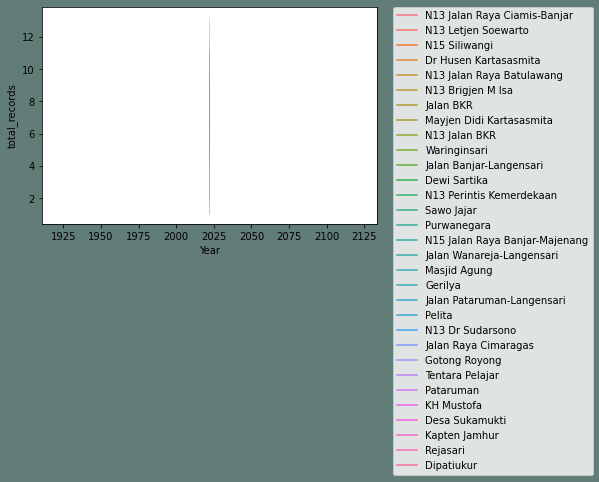

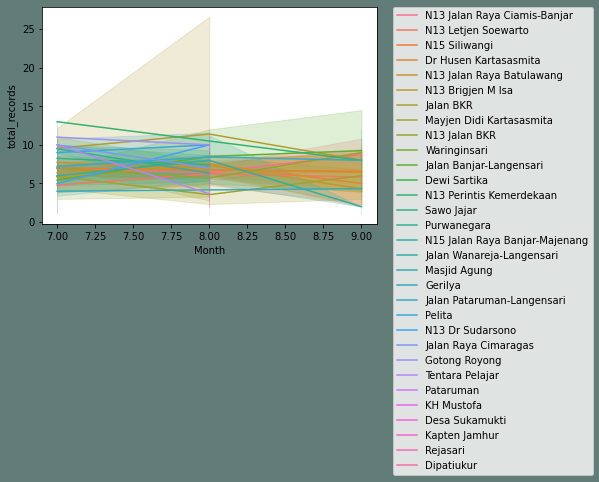

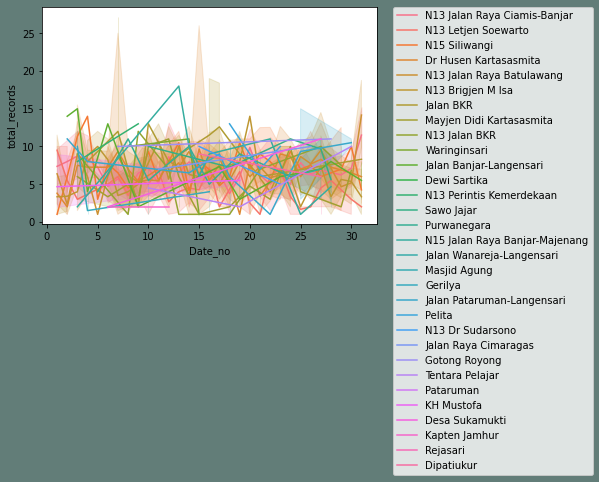

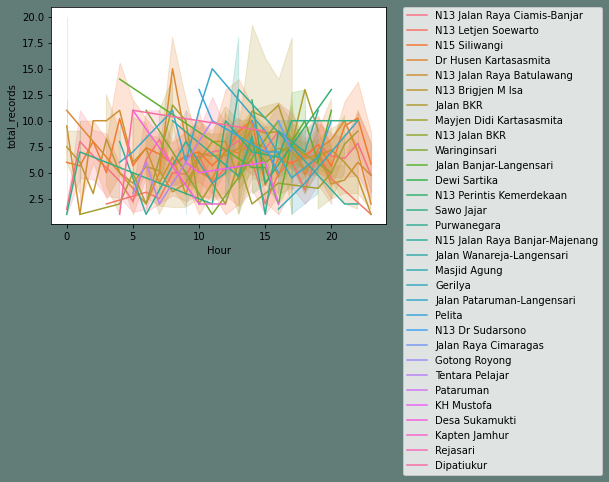

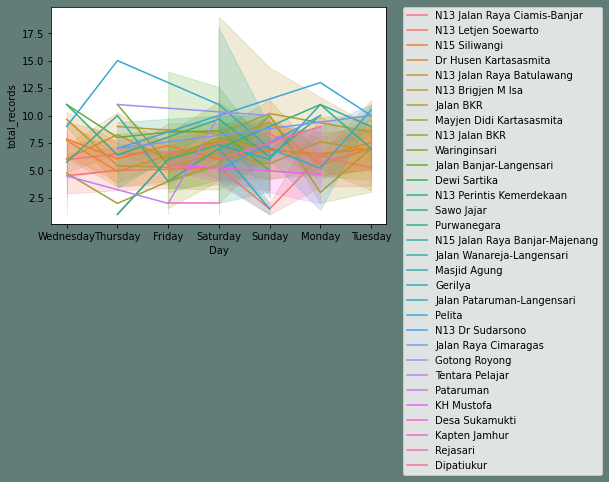

In [27]:
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(facecolor="#627D78")
    ax=sns.lineplot(x=df_fix[i],y="total_records",data=df_fix, hue="street")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

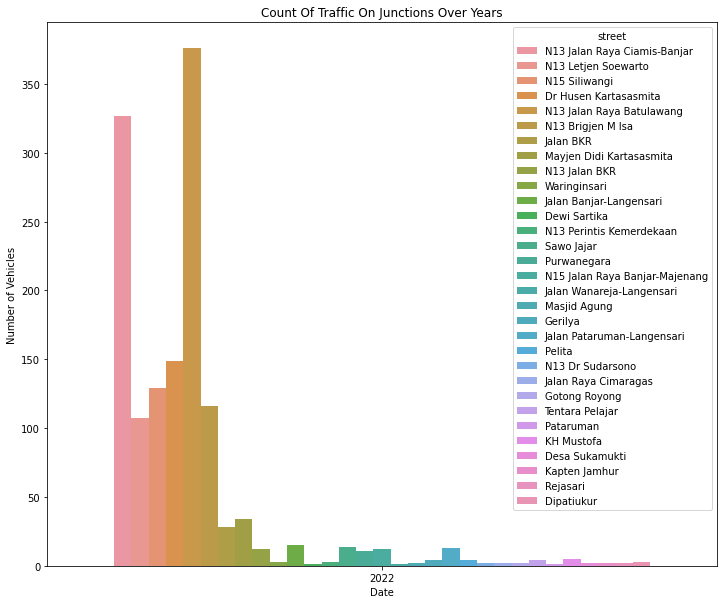

In [28]:
plt.figure(figsize=(12,10))
count = sns.countplot(data=df_fix, x =df_fix["Year"], hue="street")
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

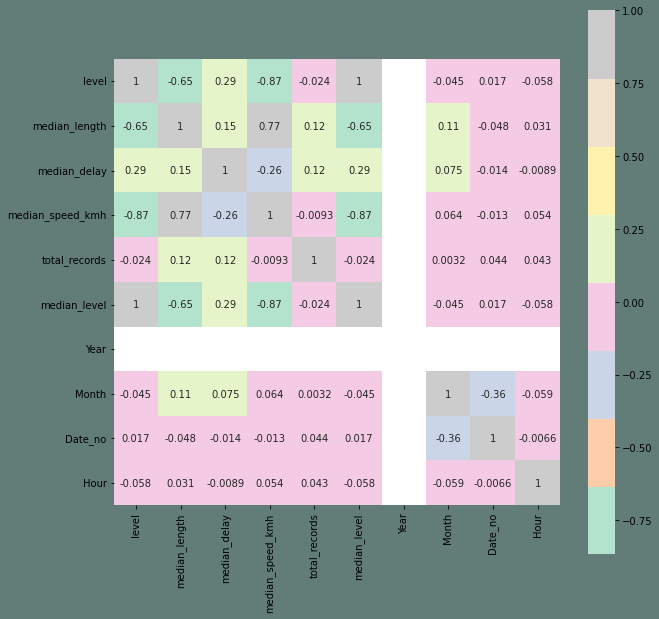

In [29]:
corrmat = df_fix.corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )

Korelasi diatas bahwa Year tidak memiliki korelasi dengan variabel lain maka bisa diabaikan atau diikut tidak akan berpengaruh

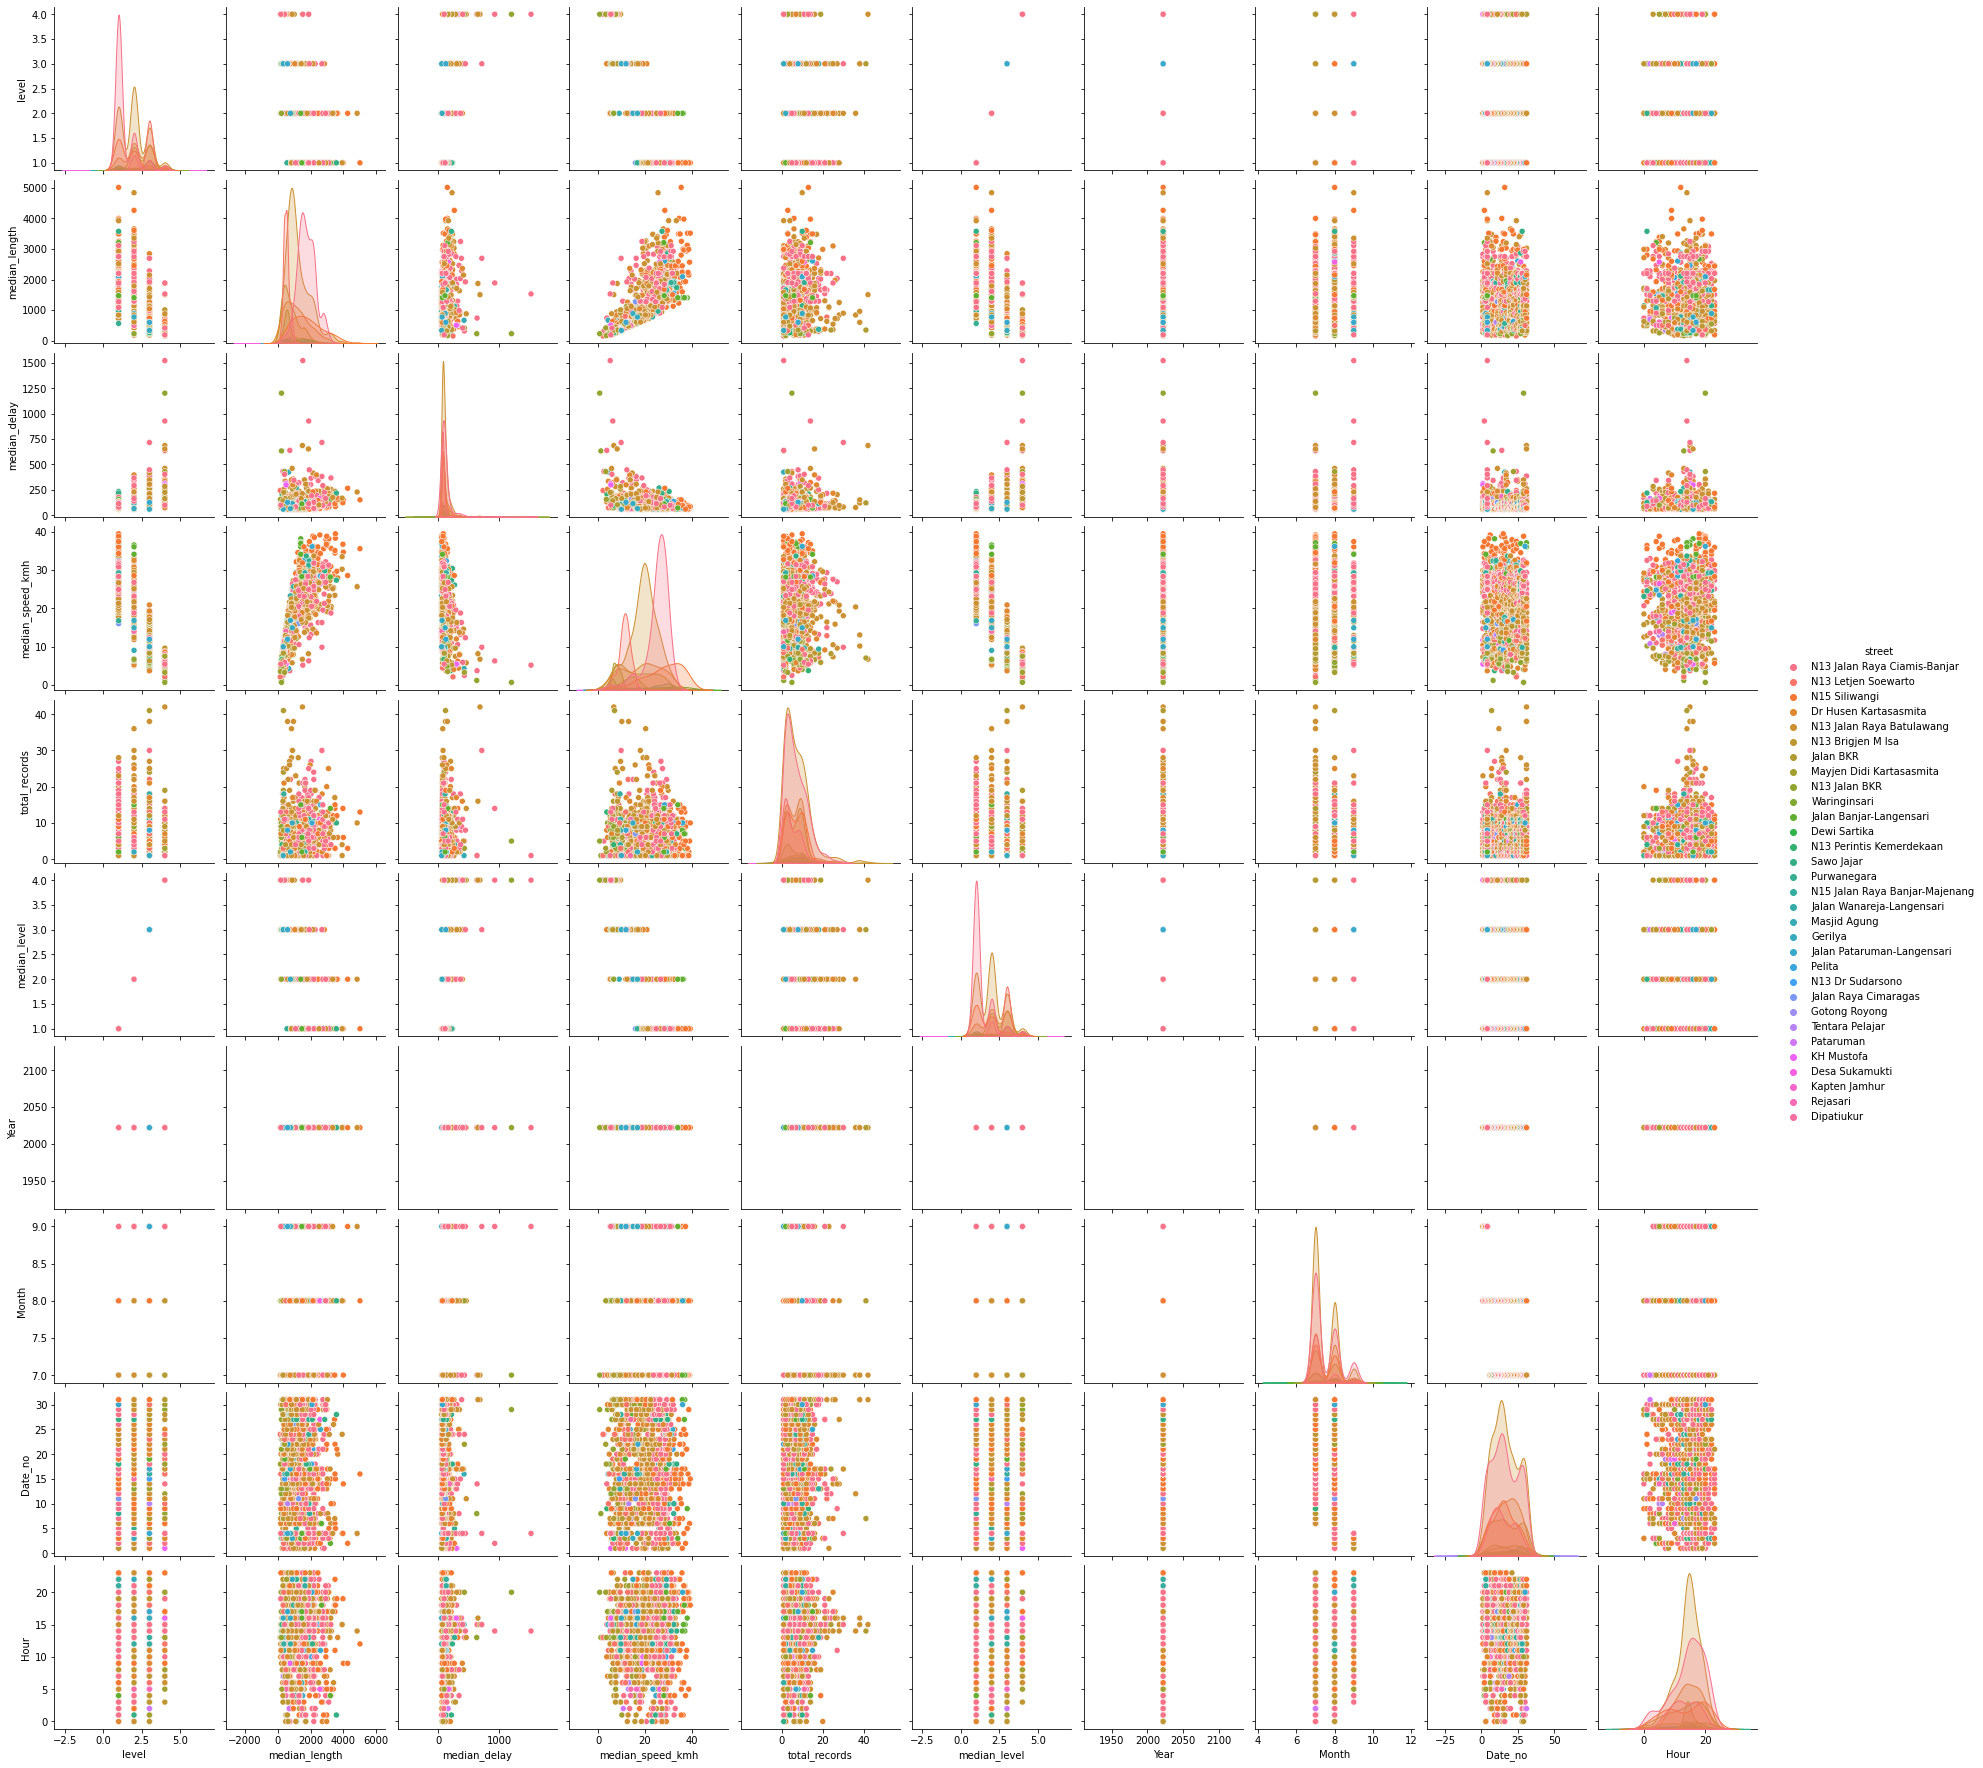

In [30]:
sns.pairplot(data=df_fix, hue= "street")


**Create Dataset split**

> Indented block



In [31]:
df_fix['Day'] = df_fix['Day'].replace(['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], [1,2,3,4,5,6,7])
df_fix

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,Year,Month,Date_no,Hour,Day
0,2022-07-06 02:00:00,N13 Jalan Raya Ciamis-Banjar,1,2201.0,84.0,29.779999,6,1.0,2022,7,6,2,4
1,2022-07-06 06:00:00,N13 Letjen Soewarto,3,561.0,87.0,10.670000,1,3.0,2022,7,6,6,4
2,2022-07-06 07:00:00,N15 Siliwangi,2,1637.0,110.0,27.110000,7,2.0,2022,7,6,7,4
3,2022-07-06 07:00:00,N13 Letjen Soewarto,3,561.0,65.5,12.035000,2,3.0,2022,7,6,7,4
4,2022-07-06 09:00:00,N13 Letjen Soewarto,2,501.0,63.5,12.705000,2,2.0,2022,7,6,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2022-09-04 17:00:00,N13 Jalan Raya Batulawang,2,3354.0,176.0,25.060000,11,2.0,2022,9,4,17,1
1546,2022-09-04 18:00:00,N13 Jalan Raya Ciamis-Banjar,1,1845.0,82.0,28.300000,7,1.0,2022,9,4,18,1
1547,2022-09-04 19:00:00,N13 Jalan Raya Ciamis-Banjar,4,188.0,100.0,5.420000,13,4.0,2022,9,4,19,1
1548,2022-09-04 20:00:00,N13 Jalan Raya Ciamis-Banjar,1,1887.0,115.0,24.880000,5,1.0,2022,9,4,20,1


In [32]:
df_fix['partition'] = [None] * df_fix.shape[0]
df_fix.reset_index(inplace=True)
df_fix

,index,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,Year,Month,Date_no,Hour,Day,partition
0,0,2022-07-06 02:00:00,N13 Jalan Raya Ciamis-Banjar,1,2201.0,84.0,29.779999,6,1.0,2022,7,6,2,4,None
1,1,2022-07-06 06:00:00,N13 Letjen Soewarto,3,561.0,87.0,10.670000,1,3.0,2022,7,6,6,4,None
2,2,2022-07-06 07:00:00,N15 Siliwangi,2,1637.0,110.0,27.110000,7,2.0,2022,7,6,7,4,None
3,3,2022-07-06 07:00:00,N13 Letjen Soewarto,3,561.0,65.5,12.035000,2,3.0,2022,7,6,7,4,None
4,4,2022-07-06 09:00:00,N13 Letjen Soewarto,2,501.0,63.5,12.705000,2,2.0,2022,7,6,9,4,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,1545,2022-09-04 17:00:00,N13 Jalan Raya Batulawang,2,3354.0,176.0,25.060000,11,2.0,2022,9,4,17,1,None
1382,1546,2022-09-04 18:00:00,N13 Jalan Raya Ciamis-Banjar,1,1845.0,82.0,28.300000,7,1.0,2022,9,4,18,1,None
1383,1547,2022-09-04 19:00:00,N13 Jalan Raya Ciamis-Banjar,4,188.0,100.0,5.420000,13,4.0,2022,9,4,19,1,None
1384,1548,2022-09-04 20:00:00,N13 Jalan Raya Ciamis-Banjar,1,1887.0,115.0,24.880000,5,1.0,2022,9,4,20,1,None


In [33]:
# Membuat train and test split untuk modeling
import random
enum = {
    1: 'train',
    2: 'valid', 
    3: 'test'
}


train = 0.5
valid = 0.3
test = 0.2

lst_code_street = list(set(df_fix['street']))

for code_street in lst_code_street:
    used_df_fix = df_fix[df_fix['street'] == code_street]
    length = used_df_fix.shape[0]

    train_cnt = int(train * length)
    valid_cnt = int(valid * length)
    test_cnt = int(test * length)
    lst_cnt = [0, train_cnt, valid_cnt, test_cnt]
    if length - sum(lst_cnt) != 0:
        gap = length - sum(lst_cnt)
        for i in range(gap):
            idx = random.randint(2, 3)
            lst_cnt[idx] += 1
    
    for i in range(1, len(lst_cnt)):
        part = enum[i]
        prev = sum(lst_cnt[0:i])
        curr = lst_cnt[i]
        data = used_df_fix.iloc[prev:prev+curr, :]
        for index in data['index']:
            df_fix.loc[df_fix['index'] == index, 'partition'] = part

In [34]:
sum(df_fix['partition'].value_counts())

1386

In [35]:
df_fix['partition'].value_counts()

train    686
valid    418
test     282
Name: partition, dtype: int64

**Modeling**

In [36]:
class Evaluation:
    
    def __init__(self, actual, pred):
        self.actual = actual
        self.pred = pred
    
    def get_rmse(self):
        return mean_squared_error(self.actual, self.pred, squared=False)
    
    def get_mae(self):
        return mean_absolute_error(self.actual, self.pred)
    
    def get_mape(self):
        return mean_absolute_percentage_error(self.actual, self.pred)
    
    def get_r2_score(self):
        return r2_score(self.actual, self.pred)
    
    def get_eval_result(self):
        result = {
            'rmse': self.get_rmse(),
            'mae': self.get_mae(),
            'mape': self.get_mape(),
            'r2': self.get_r2_score() 
        }
        return result

In [37]:
class Inference:

    def __init__(self, model_name):
        self.random_state = 8
        self.model_name = model_name
        self.model = self.create_model(model_name)
    
    def create_model(self, model_name):
        model = None
        if model_name == 'LinearRegression':
            model = LinearRegression()
        elif model_name == 'SVR':
            model = SVR()
        elif model_name == 'RandomForest':
            model = RandomForestRegressor(random_state=self.random_state)
        elif model_name == 'XGBoost':
            model = XGBRegressor(random_state=self.random_state)
        elif model_name == 'CatBoost':
            model = CatBoostRegressor(random_seed=self.random_state)
        return model
    
    def train(self, data):
        X = data.iloc[:, 1:-1]
        y = data.iloc[:, -1]
        self.model.fit(X, y)
    
    def predict(self, data):
        return self.model.predict(data.iloc[:, 1:-1])
    
    def save_model(self):
        path = "./model/model_{}.pkl".format(self.model_name)
        with open(path, 'wb') as file:
            pickle.dump(self.model, file)

In [38]:
used_col = [
    'partition',
    'median_length',	
    'median_delay',
    'median_speed_kmh',
    'total_records',
    'median_level',
    'Year','Month',
    'Date_no',
    'Hour',
    'Day',
    'level'
]

df_pred = df_fix.loc[:,used_col]
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   partition         1386 non-null   object 
 1   median_length     1386 non-null   float64
 2   median_delay      1386 non-null   float64
 3   median_speed_kmh  1386 non-null   float64
 4   total_records     1386 non-null   int64  
 5   median_level      1386 non-null   float64
 6   Year              1386 non-null   int64  
 7   Month             1386 non-null   int64  
 8   Date_no           1386 non-null   int64  
 9   Hour              1386 non-null   int64  
 10  Day               1386 non-null   int64  
 11  level             1386 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 130.1+ KB


In [39]:
lst_model = [
    'LinearRegression',
    'SVR',
    'RandomForest',
    'XGBoost',
    'CatBoost'
]

model_dct = {}

data = []

train_df = df_pred[df_pred['partition'] == 'train']
test_df = df_pred[df_pred['partition'] == 'test']

for model_name in lst_model:

    print(model_name)

    model = Inference(model_name)
    model.train(train_df)
    prediction_result = model.predict(test_df)
    eval_model = Evaluation(test_df.iloc[:,-1], prediction_result)
    eval_res = eval_model.get_eval_result()
    data.append([
        model_name,
        eval_res['rmse'],
        eval_res['mae'],
        eval_res['mape'],
        eval_res['r2']
    ])

    model_dct[model_name] = model

result_df = pd.DataFrame(
    data=data,
    columns=['model_name', 'rmse', 'mae', 'mape', 'r2']
)

LinearRegression
SVR
RandomForest
XGBoost
[05:45:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CatBoost
Learning rate set to 0.038576
0:	learn: 0.8650149	total: 47.6ms	remaining: 47.5s
1:	learn: 0.8335897	total: 50ms	remaining: 24.9s
2:	learn: 0.8035104	total: 50.5ms	remaining: 16.8s
3:	learn: 0.7765089	total: 52.1ms	remaining: 13s
4:	learn: 0.7490045	total: 54.1ms	remaining: 10.8s
5:	learn: 0.7220755	total: 55.6ms	remaining: 9.21s
6:	learn: 0.6972711	total: 56.9ms	remaining: 8.07s
7:	learn: 0.6764119	total: 57.7ms	remaining: 7.15s
8:	learn: 0.6527271	total: 58.5ms	remaining: 6.44s
9:	learn: 0.6290269	total: 59.7ms	remaining: 5.91s
10:	learn: 0.6080105	total: 61ms	remaining: 5.48s
11:	learn: 0.5880108	total: 62.4ms	remaining: 5.14s
12:	learn: 0.5667096	total: 63.6ms	remaining: 4.83s
13:	learn: 0.5464880	total: 64.9ms	remaining: 4.57s
14:	learn: 0.5264102	total: 66ms	remaining: 4.34s
15:	learn: 0.5076805	total: 67

In [40]:
result_df

,model_name,rmse,mae,mape,r2
0,LinearRegression,2.878702e-14,2.189029e-14,1.295352e-14,1.000000
1,SVR,5.151562e-01,3.991912e-01,2.253660e-01,0.681494
2,RandomForest,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
3,XGBoost,6.859675e-05,4.752900e-05,1.849111e-05,1.000000
4,CatBoost,1.197146e-01,6.458391e-02,4.089020e-02,0.982800


In [41]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [42]:
# Fit the grid search to the data
data_train=df_pred[df_pred['partition'] == 'train']
train_features=data_train.drop(['level','partition'], axis=1)
train_labels=data_train['level']
data_test=df_pred[df_pred['partition'] == 'test']
test_features=data_test.drop(['level','partition'], axis=1)
test_labels=data_test['level']


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [43]:
rf_random.best_params_
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of 0.00%.


In [44]:
grid_search.fit(train_features, train_labels)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 0.0968 degrees.
Accuracy = 94.36%.
Improvement of -5.64%.


In [45]:
# Fit the model on the training data
rf.fit(train_features, train_labels)

# Make predictions on the test data
y_pred = rf.predict(test_features)

In [46]:
y_pred

array([1., 2., 2., 3., 2., 3., 3., 3., 3., 3., 4., 3., 3., 3., 4., 1., 3.,
       3., 3., 2., 3., 1., 1., 1., 2., 2., 4., 3., 3., 1., 3., 2., 4., 2.,
       2., 1., 2., 2., 2., 3., 2., 1., 2., 3., 2., 3., 4., 2., 3., 2., 2.,
       3., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 3., 4., 3., 3., 1.,
       2., 1., 2., 2., 1., 1., 1., 3., 4., 1., 1., 2., 3., 1., 1., 2., 1.,
       1., 3., 2., 3., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 3., 1.,
       1., 1., 3., 2., 3., 3., 2., 3., 1., 2., 1., 2., 1., 1., 3., 1., 1.,
       3., 3., 1., 2., 1., 1., 1., 2., 1., 2., 3., 4., 1., 2., 2., 1., 2.,
       4., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 3., 1., 3., 3., 1., 1.,
       3., 1., 2., 3., 2., 2., 1., 2., 2., 1., 1., 2., 3., 1., 2., 3., 2.,
       3., 1., 3., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 3., 3., 1., 3.,
       1., 1., 1., 1., 3., 2., 1., 2., 3., 1., 1., 2., 1., 1., 2., 2., 1.,
       1., 1., 2., 3., 1., 3., 1., 3., 1., 1., 2., 2., 3., 2., 1., 2., 2.,
       4., 3., 3., 1., 2.

In [47]:
np.unique(y_pred, return_counts=True)


(array([1., 2., 3., 4.]), array([104,  92,  71,  15]))